In [1]:
import sys
sys.path.append('..')
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import zefiia.utility as zfu

## Load Image

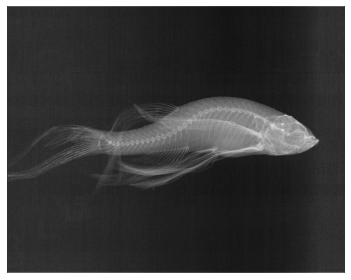

In [2]:
img = np.load('img_x_ray.npy')
img = img.astype(float)
img = img / img.mean(axis=0)[np.newaxis, :] * 255  # uniform intensity along x-axis
plt.imshow(img, cmap='gray')
plt.gcf().set_size_inches(5, 4)
plt.axis('off')
plt.tight_layout()
plt.show()

## Pick a Threshold Value

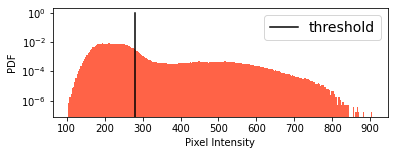

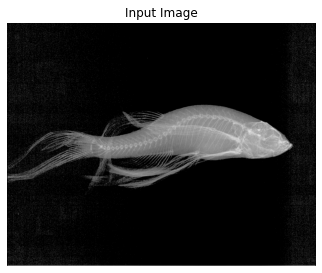

In [3]:
threshold = 280

# The following code is for plotting only
plt.hist(img.ravel(), bins=250, density=True, color='tomato')
plt.plot((threshold, threshold), (0, 1), color='k', ls='-', label='threshold')
plt.legend(fontsize=14)
plt.gca().set_yscale('log')
plt.xlabel('Pixel Intensity')
plt.ylabel('PDF')
plt.gcf().set_size_inches((6, 2))
plt.show()
binary = img.copy().astype(np.float64)
binary[img < threshold] = 0
plt.imshow(binary, cmap='gray')
plt.gcf().set_size_inches(5, 4)
plt.tight_layout()
plt.title('Input Image')
plt.axis('off')
plt.show()

## Locate the features on the spine

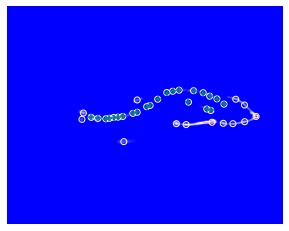

100%|██████████| 40/40 [00:02<00:00, 17.53it/s]
0it [00:00, ?it/s]


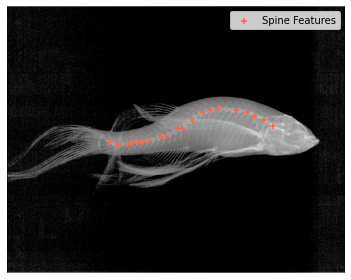

In [4]:
size = 32
degree = 5
n_jobs = 8      # using multiple processors, be realistic with your computer
opt_cycles = 0  # needed for high-resolution image

N = 40          # ransac parameter, higher == more likely getting better fittign
sigma = size/4  # ransac parameter, the allowed error of the fit
report = True   # plot intermediate results

spine_features = zfu.get_spine_features(
    binary, size=size, degree=degree, N=N, n_jobs=n_jobs,
    optimise_cycle=opt_cycles, sigma=size/3,
    see_cc=report, see_features=report, report=report,
)

## Convert Features into Labels

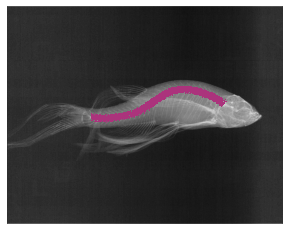

In [5]:
spine_label = zfu.get_spine_from_features(
    img, spine_features, size, degree=10, blur=2, threshold=1
)
zfu.imshow_with_mask(img, spine_label)